In [258]:
#Flight Price Prediction
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Flight Price Prediction

## Introduction

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. 

In [259]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [260]:
test_df = pd.read_excel('Test_set.xlsx')

In [261]:
final_df = train_df.append(test_df)

In [262]:
final_df.shape

(13354, 11)

In [263]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [264]:
final_df['Date_of_Journey'].str.split('/').str[2]

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2666    2019
2667    2019
2668    2019
2669    2019
2670    2019
Name: Date_of_Journey, Length: 13354, dtype: object

We can see there are a lot of object data types. It's better to convert them into numeric data types.

In [265]:
#creating a derived feature from date of journey
final_df['Day'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]

In [266]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [267]:
#convert day, month and year to integers
final_df['Day'] = final_df['Day'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [268]:
final_df.drop(columns=['Date_of_Journey'],axis=1, inplace=True)

In [269]:
#arrival and departure time (applying lambda function)
final_df['Arrival_Time'] = final_df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

From Arrival and Departure time we take out hour and minutes

In [270]:
final_df['Arrival_Hour'] = final_df['Arrival_Time'].apply(lambda x: x.split(':')[0])
final_df['Arrival_Minutes'] = final_df['Arrival_Time'].apply(lambda x: x.split(':')[1])

In [271]:
#same for departure time
final_df['Departure_Hour'] = final_df['Dep_Time'].apply(lambda x: x.split(':')[0])
final_df['Departure_Minutes'] = final_df['Dep_Time'].apply(lambda x: x.split(':')[1])

In [272]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [273]:
final_df.drop(columns = ['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [274]:
#convert data type from object to int
columns = ['Arrival_Hour','Arrival_Minutes','Departure_Hour','Departure_Minutes']

for col in columns:
    
    final_df[col] = final_df[col].astype(int)

In [275]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  object 
 1   Source             13354 non-null  object 
 2   Destination        13354 non-null  object 
 3   Route              13353 non-null  object 
 4   Duration           13354 non-null  object 
 5   Total_Stops        13353 non-null  object 
 6   Additional_Info    13354 non-null  object 
 7   Price              10683 non-null  float64
 8   Day                13354 non-null  int64  
 9   Month              13354 non-null  int64  
 10  Year               13354 non-null  int64  
 11  Arrival_Hour       13354 non-null  int64  
 12  Arrival_Minutes    13354 non-null  int64  
 13  Departure_Hour     13354 non-null  int64  
 14  Departure_Minutes  13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


In [276]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [277]:
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0, 
                                                       '2 stops':1, 
                                                       '1 stop':2, 
                                                       '3 stops':3, 
                                                       'nan':1,
                                                       '4 stops':4})

In [278]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50


In [279]:
#Route reveals extra and not necessary informatipn
#final_df.drop(columns = ['Route'], axis = 1, inplace = True)

In [280]:
#We have to split also duration
final_df['Duration_Hour'] = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
final_df['Duration_Minutes'] = final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [281]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_Hour,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [282]:
final_df['Duration_Minutes'] = final_df['Duration_Minutes'].fillna(0)

In [283]:
final_df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Route                   1
Duration                0
Total_Stops             1
Additional_Info         0
Price                2671
Day                     0
Month                   0
Year                    0
Arrival_Hour            0
Arrival_Minutes         0
Departure_Hour          0
Departure_Minutes       0
Duration_Hour           0
Duration_Minutes        0
dtype: int64

In [284]:
final_df.drop(columns = ['Route'], axis = 1, inplace=True)

In [285]:
final_df[final_df['Duration_Hour'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_Hour,Duration_Minutes
6474,Air India,Mumbai,Hyderabad,5m,1.0,No info,17327.0,6,3,2019,16,55,16,50,5m,0
2660,Air India,Mumbai,Hyderabad,5m,1.0,No info,NaN,12,3,2019,16,55,16,50,5m,0


In [286]:
final_df.drop(6474, axis = 0, inplace = True)
final_df.drop(2660, axis = 0, inplace = True)

In [287]:
#convert duration hour and duration minutes into int 
columns = ['Duration_Hour','Duration_Minutes']

for col in columns:
    
    final_df[col] = final_df[col].astype(int)

In [288]:
final_df.drop(columns = ['Duration'], axis = 1, inplace = True)

In [289]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [291]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

final_df['Airline'] = encoder.fit_transform(final_df['Airline'])
final_df['Source'] = encoder.fit_transform(final_df['Source'])
final_df['Destination'] = encoder.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = encoder.fit_transform(final_df['Additional_Info'])

#final_df['Airline'] = encoder.fit_transform(np.array(final_df['Airline']).reshape(-1,1))
#final_df['Source'] = encoder.fit_transform(np.array(final_df['Source']).reshape(-1,1))
#final_df['Destination'] = encoder.fit_transform(np.array(final_df['Destination']).reshape(-1,1))
#final_df['Additional_Info'] = encoder.fit_transform(np.array(final_df['Additional_Info']).reshape(-1,1))

In [292]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13351 non-null  int64  
 1   Source             13351 non-null  int64  
 2   Destination        13351 non-null  int64  
 3   Total_Stops        13350 non-null  float64
 4   Additional_Info    13351 non-null  int64  
 5   Price              10681 non-null  float64
 6   Day                13351 non-null  int64  
 7   Month              13351 non-null  int64  
 8   Year               13351 non-null  int64  
 9   Arrival_Hour       13351 non-null  int64  
 10  Arrival_Minutes    13351 non-null  int64  
 11  Departure_Hour     13351 non-null  int64  
 12  Departure_Minutes  13351 non-null  int64  
 13  Duration_Hour      13351 non-null  int64  
 14  Duration_Minutes   13351 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.6 MB


In [293]:
#populating null values of price with its mean
final_df['Price'] = final_df['Price'].fillna(final_df['Price'].mean())

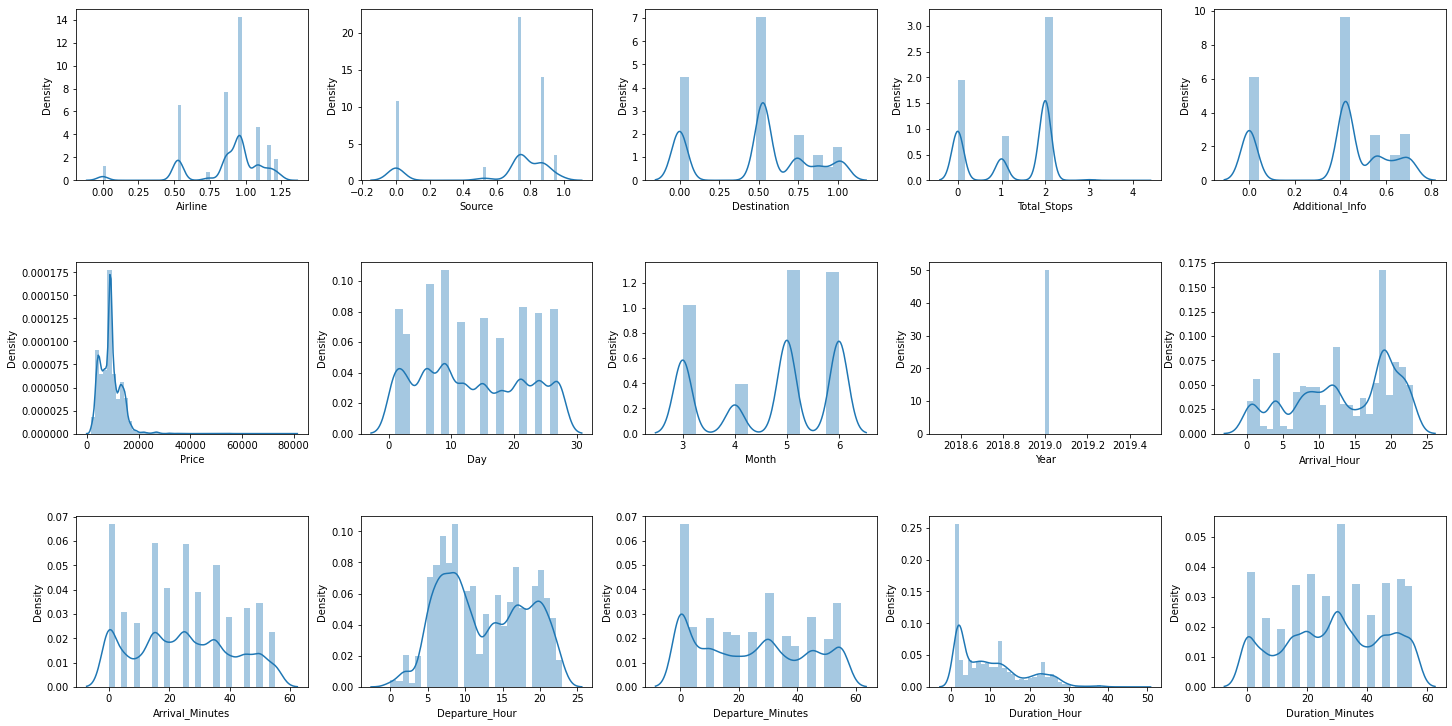

In [300]:
fig, ax = plt.subplots(ncols=5, nrows = 3, figsize = (20,10))
ax = ax.flatten()
index = 0
for k, v in final_df.items():
    sns.distplot(v, ax = ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [295]:
#analyzing outliers
for k, v in final_df.items():

    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    
    iqr = q3 - q1
    
    v_col = v[(v<= (q1 - (1.5 * iqr))) | (v >= (q3 + (1.5 * iqr)))]
    
    percentage = (v_col.shape[0] * 100) / final_df.shape[0]
    
    print("Outliers of ",k," are: ",round(percentage,2),"%")

Outliers of  Airline  are:  43.4 %
Outliers of  Source  are:  20.61 %
Outliers of  Destination  are:  8.76 %
Outliers of  Total_Stops  are:  0.0 %
Outliers of  Additional_Info  are:  100.0 %
Outliers of  Price  are:  1.54 %
Outliers of  Day  are:  0.0 %
Outliers of  Month  are:  0.0 %
Outliers of  Year  are:  100.0 %
Outliers of  Arrival_Hour  are:  0.0 %
Outliers of  Arrival_Minutes  are:  0.0 %
Outliers of  Departure_Hour  are:  0.0 %
Outliers of  Departure_Minutes  are:  0.0 %
Outliers of  Duration_Hour  are:  0.7 %
Outliers of  Duration_Minutes  are:  0.0 %


In [298]:
final_df['Airline'] = np.log(final_df['Airline'] + 1)
final_df['Source'] = np.log(final_df['Source'] + 1)
final_df['Destination'] = np.log(final_df['Destination'] + 1)
final_df['Additional_Info'] = np.log(final_df['Destination'] + 1)

In [306]:
for k, v in final_df.items():

    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    
    iqr = q3 - q1
    
    v_col = v[(v<= (q1 - (1.5 * iqr))) | (v >= (q3 + (1.5 * iqr)))]
    
    percentage = (v_col.shape[0] * 100) / final_df.shape[0]
    
    print("Outliers of ",k," are: ",round(percentage,2),"%")

Outliers of  Airline  are:  31.84 %
Outliers of  Source  are:  24.03 %
Outliers of  Destination  are:  0.0 %
Outliers of  Total_Stops  are:  0.0 %
Outliers of  Additional_Info  are:  0.0 %
Outliers of  Price  are:  1.54 %
Outliers of  Day  are:  0.0 %
Outliers of  Month  are:  0.0 %
Outliers of  Year  are:  100.0 %
Outliers of  Arrival_Hour  are:  0.0 %
Outliers of  Arrival_Minutes  are:  0.0 %
Outliers of  Departure_Hour  are:  0.0 %
Outliers of  Departure_Minutes  are:  0.0 %
Outliers of  Duration_Hour  are:  0.7 %
Outliers of  Duration_Minutes  are:  0.0 %


In [304]:
final_df['Year'] = np.log(final_df['Year'] + 1)

In [302]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns = ['Price'])
y = final_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [303]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_S = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)